In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

from pathlib import Path
import os
import sys


In [25]:
# Extend system path to import project modules
PACKAGE_ROOT = Path(os.getcwd()).parent  #points to project's root directory

sys.path.append(str(PACKAGE_ROOT))

from prediction_model.config import config
from prediction_model.processing.data_handling import load_dataset, load_pipeline
from prediction_model.predict import generate_predictions

In [26]:
# ------------------------
# Load Data & Model
# ------------------------

print("[INFO] Loading dataset and trained model...")

from sklearn.model_selection import train_test_split

df = load_dataset(config.TRAIN_FILE)
X = df[config.FEATURES]
y = df[config.TARGET].map({'Y': 1, 'N': 0})
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


model = load_pipeline(config.MODEL_NAME)

print("[INFO] Model and data loaded successfully.\n")


[INFO] Loading dataset and trained model...
Model has been loaded
[INFO] Model and data loaded successfully.



In [30]:
# Predict
y_pred = model.predict(X_val)

# Evaluation
print(f"[RESULT] Accuracy      : {accuracy_score(y_val, y_pred):.4f}")
print(f"[RESULT] Precision     : {precision_score(y_val, y_pred):.4f}")
print(f"[RESULT] Recall        : {recall_score(y_val, y_pred):.4f}")
print(f"[RESULT] F1 Score      : {f1_score(y_val, y_pred):.4f}")
print(f"[RESULT] ROC-AUC Score : {roc_auc_score(y_val, y_pred):.4f}")


[RESULT] Accuracy      : 0.7886
[RESULT] Precision     : 0.7596
[RESULT] Recall        : 0.9875
[RESULT] F1 Score      : 0.8587
[RESULT] ROC-AUC Score : 0.7031


c:\Users\Somya Shekhar\Loan-Predication\packaging-ml--model\prediction_model\processing\preprocessing.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(self.mean_dict[col], inplace=True)
c:\Users\Somya Shekhar\Loan-Predication\packaging-ml--model\prediction_model\processing\preprocessing.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the i

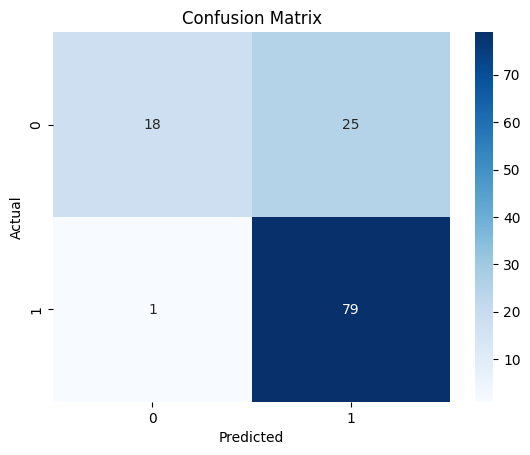

In [35]:
# Confusion matrix

cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

